## The Plebian Guide to Understanding AI

- **Introduction**
- **Inspiration**
    - *How do machines learn?*
- **Vocabulary**
    - perceptron
    - input layer
    - hidden layer
    - output layer
    - neuron
    - synapse
    - weight
    - bias
    - activation function
    - epoch
    - node map
- **Theory**
    - *Mathematics (w/ images)*
        - [Perceptron](http://neuralnetworksanddeeplearning.com/chap1.html)
        - [Neural Network](https://matrices.io/deep-neural-network-from-scratch/)
            - [Crash Course](https://www.youtube.com/watch?v=aircAruvnKk)
        - Forward Propagation
            - Sigmoid functions
            - Feed forward
            - Network diagram
            - Linear algebra breakdown
            - How to code it
        - Bias
        - Normalization
        - Gradient Descent
        - Back Propagation
            - Cost function
            - Hadamard product
            - Fundamental equations
            - Algorithm
    - *Graphs*
    - *Code for each portion*
- **Code**
    - *Full class examples*
    - *sample data for proofs*
- **Conclusion**
    - *So what?*

## Forward Progapagtion

Forward propagation is exactly as its name implies - propagating forward through the neural network. If "propagation" seems like a hard word to remember, just remember that forward propagation is simply the spread of data from the input of the network, through the hidden layers, and to the output(s). This is a lot of word vomit that can be summed up in a single picture:

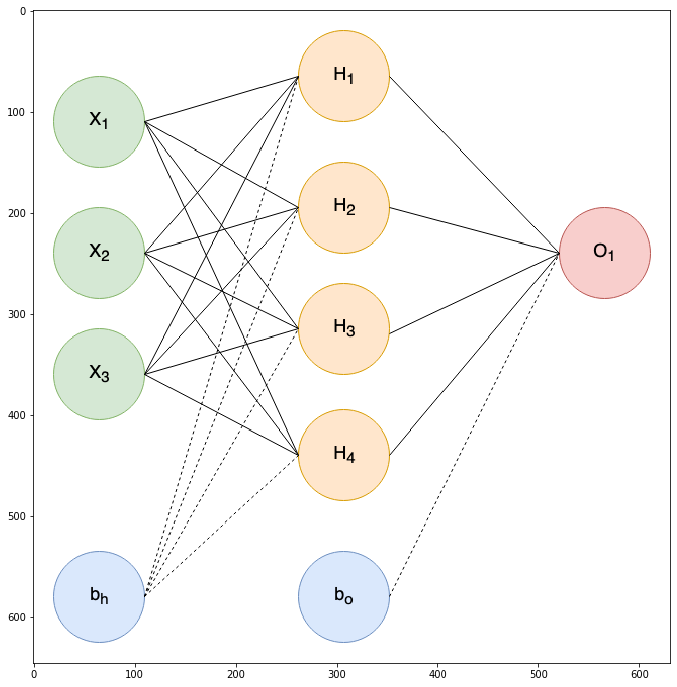

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


file_path = '/Users/nickburkhalter/Desktop/Lambda School/Portfolio/Images/neural_network_diagram.png'
image = mpimg.imread(file_path)
plt.figure(figsize=(18,12))
plt.imshow(image)
plt.show()

where X is our input layer, H is our hidden layer, O is our output layer, and b is our bias. The weights of each input are illustrated as the solid lines that connect each neuron.

OK, so we see how everything is connected, but how does it all _work_? Going back to our definition of forward propagation and data _spreading_ through the network, really all we're going to do is move through the network one layer at a time until we reach the output. And the key to doing that is good ol' algebra (linear algebra, to be exact)!

We'll use the infamous linear equation to move from the input layer, X, to the hidden layer, H:

$$y = mx + b$$

Adjusting the variables to fit our specific needs, we change the formula to:

$$z = wX + b$$

where $w$ is the input's weight, $X$ is the input, and $b$ is the bias. Furthermore, because our $X$ is a feature _matrix_ and not a singular input, we need to express the equation in linear algebra terms:

$$z^{H} = w^{H} \cdot X + b^{H}$$

where we take the _dot product_ of our $X$ feature matrix and $w^{H}$ hidden weights matrix and add it to the $b^{H}$ hidden bias matrix. This is much easier than it sounds!



Let's go back to linear algebra basics for a bit, specifically matrix multiplication. It's important to remember that in order to multiply 2 matrices together, the number of columns in the first matrix must equal the number of rows in the second matrix. So for example, say we have a matrix $m_{1}$, which is an $m{\times}k$ matrix and we wish to multiply it by some matrix, $m_{2}$ so that the product is an $m{\times}n$ matrix, then the dimensions of $m_{2}$ _must_ equal $k{\times}n$:

$$m_{1} \cdot m_{2} = m{\times}k \cdot k{\times}n = m{\times}n$$


So this means for our neural network that our input matrix has $m$ rows and $k$ feature columns, and the weights matrix has $k$ rows and $n$ columns, where $n$ columns equals the number of neurons in the next layer. In our example above, we have 3 input features, and 4 hidden features, so our equation now looks like:
$$z^{H} = \left( \begin{bmatrix}
       X_{1} & X_{2} & X_{3}
     \end{bmatrix} \cdot
     \begin{bmatrix}
       w_{11}^{H} & w_{12}^{H} & w_{13}^{H} & w_{14}^{H} \\[0.2em]
       w_{21}^{H} & w_{22}^{H} & w_{23}^{H} & w_{24}^{H} \\[0.2em]
       w_{31}^{H} & w_{32}^{H} & w_{33}^{H} & w_{34}^{H}
     \end{bmatrix} \right) + b^{H}$$
     
We can now perform matrix multiplucation to get the following result:

$$z^{H} = \begin{bmatrix}
          (X_{1}w_{11}^{H} + X_{2}w_{21}^{H} + X_{3}w_{31}^{H}) & (X_{1}w_{12}^{H} + X_{2}w_{22}^{H} + X_{3}w_{32}^{H}) & (X_{1}w_{13}^{H} + X_{2}w_{23}^{H} + X_{3}w_{33}^{H}) & (X_{1}w_{14}^{H} + X_{2}w_{24}^{H} + X_{3}w_{34}^{H})
          \end{bmatrix} + b^{H}$$
          
Lastly, we can take care of that little $b$ sitting there all by itself, unaccounted for. $b$, or the bias constant, is simply a matrix representation of the bias in each hidden or output layer. This bias $b$ is added to the weighed input layer we just calculated _before_ being fed into the next layer's activation function. A linear algebraic representation of $b$ would be as follows (note that we simplified the weighed input matrix for simplicity's sake):

$$z^{H} = \begin{bmatrix}
          w_{1}X_{1} & w_{2}X_{2} & w_{3}X_{3} & w_{4}X_{4}
          \end{bmatrix} + \begin{bmatrix}
          b_{1}^{H} & b_{2}^{H} & b_{3}^{H} & b_{4}^{H}
          \end{bmatrix}$$
          
$$z^{H} = \begin{bmatrix}
          (w_{1}X_{1} + b_{1}^{H}) & (w_{2}X_{2} + b_{2}^{H}) & (w_{3}X_{3} + + b_{3}^{H}) & (w_{4}X_{4} + b_{4}^{H})
          \end{bmatrix}$$
          
Finally, we can further simplify $z^{H}$:

$$z^{H} = \begin{bmatrix}
          H_{1} & H_{2} & H_{3} & H_{4}
          \end{bmatrix}$$
          
Now we have the inputs for our hidden layer in $z_{H}$. _HOWEVER_, these results are _not_ what will be fed into the next $z$ equation - we must first pass these into the hidden neurons' activation function. Therefore:

$$a^{H} = \sigma (z^{H})$$

where $\sigma$ is the layer's activation, or _sigmoid_, function, defined as (for our example):

$$\sigma = \frac{1}{1 + e^{-x}}$$

Therefore, the outputs of our hidden layer, and subsequently the inputs of our output layer are as follows:

$$a^{H} = \begin{bmatrix}
          \sigma(H_{1}) & \sigma(H_{2}) & \sigma(H_{3}) & \sigma(H_{4})
          \end{bmatrix}$$
          
Applying the formula, we get:

$$a^{H} = \begin{bmatrix}
          \frac{1}{1 + e^{-H_{1}}} & \frac{1}{1 + e^{-H_{2}}} & \frac{1}{1 + e^{-H_{3}}} & \frac{1}{1 + e^{-H_{4}}}
          \end{bmatrix}$$
          


And finally, for simple notation, we will refer to the above equation as $a^{H}$ going forward.
          
          
You might be thinking at this point, "Wow! that was a lot!" And you'd be correct. Unfortunately, that only solves the first part of this equation. We have to do it all over again, using the hidden layer's inputs $a^{H}$ and feeding forward to the network's output layer to get our predictions!

Luckily, because our output is only 1 neuron, we're only returning a single-column matrix, so the math should be less hairy.

Again, we use the equation:

$$z = wX + b$$

which for our purposes, will be written as:

$$z^{O} = (w^{O} \cdot a^{H}) + b^{O}$$

where $z^{O}$ is the sum of $w^{O}a^{H}$, the weighted input matrix of the hidden layer's inputs times the output weights, and $b^{O}$, the output bias.

Because our input matrix shape is $1 \times 4$, and our output has only one column (1 neuron), our $w^{O}$ matrix needs to be a $4 \times 1$ so that the output matrix gives us our singular column (_NOTE_: you might have noticed that by doing this, we'll get a singular result; however, this singular result _does not_ mean that the result will only be a singular value. The column may have hundreds, thousands, or even _millions_ of rows, depending on the shape of the initial $X$ input. What this means is that we're taking 3 features from the input data, propagating through a neural network, and spitting out a single prediction for _each row_ of the data).

The math is as follows:

$$z^{O} = \left(\begin{bmatrix}
          a_{1}^{H} & a_{2}^{H} & a_{3}^{H} & a_{4}^{H}
          \end{bmatrix} \cdot \begin{bmatrix}
          w_{1}^{O} \\[0.2em]
          w_{2}^{O} \\[0.2em]
          w_{3}^{O} \\[0.2em]
          w_{4}^{O}
          \end{bmatrix} \right) + b^{O}$$
          
Performing matrix multiplication, we get:

$$z^{O} = \begin{bmatrix}
          (a_{1}^{H}w_{1}^{O}) + (a_{2}^{H}w_{2}^{O}) + (a_{3}^{H}w_{3}^{O}) + (a_{4}^{H}w_{4}^{O})
          \end{bmatrix} + b^{O}$$
          
Which can be simplified to simply:

$$z^{O} = \begin{bmatrix}
          a^{H}w^{O}
          \end{bmatrix} + \begin{bmatrix}
          b^{O}
          \end{bmatrix}$$
          
And we can therefore conclude:

$$z^{O} = \begin{bmatrix}
          O
          \end{bmatrix}$$
          
Now that we have $z^{O}$, we pass it through the output neuron's activation function, $\sigma$, to get our prediction, or $\hat{y}$:

$$\begin{align*}
a^{O} &= \sigma(z^{O})\\
&= \sigma \begin{bmatrix} O \end{bmatrix}\\
&= \begin{bmatrix} \frac{1}{1 + e^{-O}} \end{bmatrix}\\
&= \hat{y}
\end{align*}$$

What we just did was forward propagation. We took our inputs and propagated them through the neural network to come up with an output (or prediction). This whole exercise can be summed up with the following (easy to remember) equation:

\begin{align}
 y = \sigma(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}

where $y$ is the activated value that gets passed to th enext layer of the network.

Pat yourself on the back!

## Backpropagation

### Loss Function

OK, we got our $\hat{y}$ predictions. Now we want to see how we did!

Well, I've got some bad news for you - we didn't do so hot...

Now, I know you're wondering _how_ we did so badly, especially since we put in so much effirt in our calculations. The answer is simple, and it's probably the most awesome aspect of neural networks - our weights and biases were generated _at random_ before we propagated through the network!

#### "So we just made a bunch of numbers up in order for your stupid linear algebra to work?!"

Well, yes and no. Neural networks are powerful in that they can "learn". And much like humans, they require a lot of repititions in order to get things right. Imagine you've been given a guitar for the first time. You've never seen one and have no idea what it's supposed to do. Chances are that the first sounds that come from your hands won't be very "musical". You need _practice_ and _repititions_ before you're making tasty tunes!

What we just did was only _one_ repitition through the neural network (well, technically, one _half_ of a repitition, as you'll see in a bit), also known as an _epoch_. Neural networks require dozens, hundreds, thousands, or sometimes even _millions_ of epochs to learn a specific task (this is called _training_). Thankfully, with code we don't have to do all these epochs by hand, but having an understanding of what's going on under the hood will help us make better models in the future.

So now that that disappointing truth has been revealed, the next question is _how_ does this neural network learn? And in order to understand how a neural network learns, we first have to discuss the **loss function**.

The loss function is simply an algorithm that helps us find the optimum weights and biases so that the output (or $\hat{y}$) from the network better approximates $y(x)$ for all training inputs $X$, or our feature matrix (or our inputs, whichever helps you remember best). Sounds like another batch of word vomit from an uppity mathematician, but basically what it means is that we want to use some function ($f(x)$ type stuff) to change our weights and biases in order to minimize our network's _error_.

Because this is a supervised learning model, our error ($J(w)$) can be defined as:

$$J(w) = y - \hat{y}$$

where $y$ is the actual target values and $\hat{y}$ is our predictions. The smaller $J(w)$ is, the better our predictions.

To keep things simple, we'll define our loss function as _the sum of the squares of the differences between predicted and actual values divided by the total number of training inputs $X$. Also known as **mean squared error**:

$$J(w) = \frac{1}{n}\sum_{X}(y_{i} - \hat{y}_i)^2$$

where $n$ is our total number of training inputs, $y_{i}$ is the expected value, and $\hat{y}_{i}$ is the predicted value.

In all honesty, there are many different kinds of [loss functions](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) to choose from. Honestly, the _type_ of problem you're trying to solve (e.g. regression vs. classification) determines which class of loss function to use. What's important to take away here is that along with the activation ($\sigma$) and optimization($\nabla$) functions, the loss function plays an extremely important role in effectively and efficiently training a model to produce reliable results.

### Gradient Descent

Here is where the math _really_ starts to get hairy.

### *Notes*

- The whole batchnorm forward prop is just simple normalization with gamma and beta:
```python
  # get sample mean and variance from the minibatch
    sample_mean = x.mean(axis=0)
    sample_var = x.var(axis=0)

    # normalize
    x_norm = (x - sample_mean) / np.sqrt(sample_var + eps)
    out = gamma * x_norm + beta
```

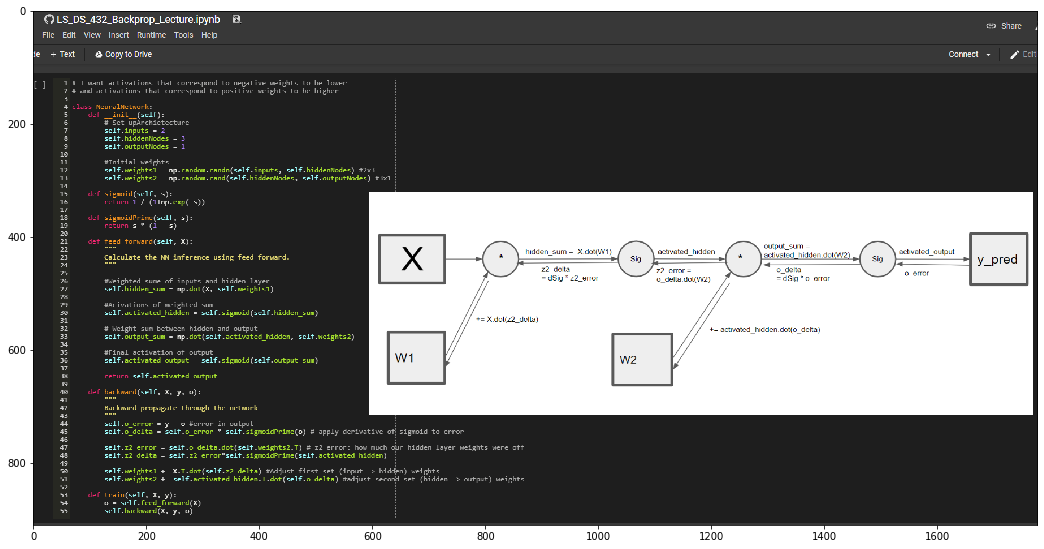

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_path = '/Users/nickburkhalter/Desktop/Lambda School/Portfolio/Images/mlp_backprop.png'
image = mpimg.imread(file_path)
plt.figure(figsize=(18,12))
plt.imshow(image)
plt.show()

In [1]:
import numpy as np
import pandas as pd


%matplotlib inline
np.random.seed(42)

## Neural Network Class Example

#### Simple 3 layer NN (Input --> Hidden --> Output)

In [3]:
class NeuralNetwork:
    
    def __init__(self, inputs=2, hidden=3, outputs=1):
        # Set up architechture
        self.inputs = inputs
        self.hiddenNodes = hidden
        self.outputNodes = outputs
        
        #Initial weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes) # 2x3
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes) # 3x1
        
        #TODO
        # Add bias to the model
        
    def sigmoid(self, s):
        '''Sigmoid/activation function'''
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        '''Derivative of sigmoid function'''
        return s * (1 -s)
    
    def feed_forward(self, X):
        '''
        Calculate the NN Inference using feed forward
        '''
        
        # Weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activation of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden & output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        '''
        Backwards propagate through the network
        '''
        self.o_error = y - o  # error in output
        self.o_delta = self.o_error *self.sigmoidPrime(o)  # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T)  # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta)  # adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)  # adjust second set (hidden => output) weights
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

## A more sophisticated model

#### Single hidden layer

In [2]:
from scipy import optimize


class Neural_Network:
    def __init__(self, inputLayerSize=3, hiddenLayerSize=4, outputLayerSize=1, seed=42):
        """
        Initialize Single Hidden Layer Neural Network with input size, hidden layer size, output layer size, learning rate, momemtum, iterations, and random seed
        """       
        # Setup architecture of neural network
        self.inputLayerSize = inputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.outputLayerSize = outputLayerSize
        
        # Set random seed fixed
        self.__set_seed(seed=seed)

        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
  
    def __set_seed(self, seed):
        np.random.seed(seed)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

    def predict(self, X, threshold=0.5):
        y_preds = nn.forward(X)
        return (y_preds > threshold).astype('int32')


class Optimizer:
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res